In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/drive/MyDrive/CSVs/* ./

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [511]:
df = pd.read_csv('/content/Facebook_stock.csv')

In [512]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,134.639999,129.949997,134.449997,131.089996,24625300,131.089996
1,2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2,2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
3,2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
4,2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003


In [513]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,206.789993,205.000000,206.300003,205.119995,6046300,205.119995
249,2019-12-26,207.820007,205.309998,205.570007,207.789993,9350700,207.789993
250,2019-12-27,208.929993,206.589996,208.669998,208.100006,10284200,208.100006
251,2019-12-30,207.899994,203.899994,207.860001,204.410004,10524300,204.410004
252,2019-12-31,205.559998,203.600006,204.000000,205.250000,8953500,205.250000


#Closing Price Analysis

In [514]:
close = df['Close']
print(close)

0      131.089996
1      135.679993
2      131.740005
3      137.949997
4      138.050003
          ...    
248    205.119995
249    207.789993
250    208.100006
251    204.410004
252    205.250000
Name: Close, Length: 253, dtype: float64


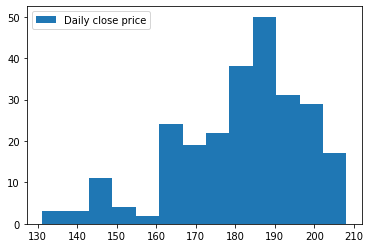

In [515]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

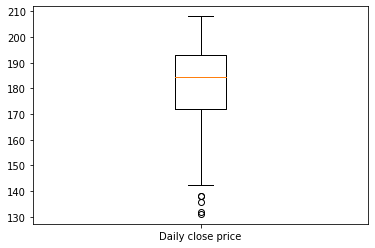

In [516]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

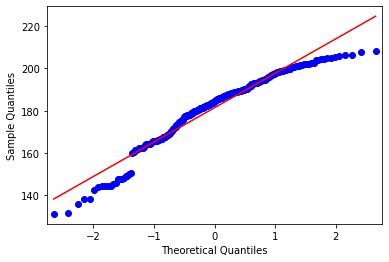

In [517]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [518]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))
print("Skewness of the distribution is: ", stats.skew(close))
print("Skewtest of the distribution is: ", stats.skewtest(close))
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Mean is:  181.4377071094136
Standard deviation is:  16.299855800829746
Median is:  184.50999450683597
Skewness of the distribution is:  -0.854742806853915
Skewtest of the distribution is:  SkewtestResult(statistic=-5.025002529544916, pvalue=5.034259008415805e-07)
Kurtosis of the distributionn is:  0.3965659664593
Kurtosis test of the distribution is:  KurtosistestResult(statistic=1.350773516918725, pvalue=0.1767679939686544)


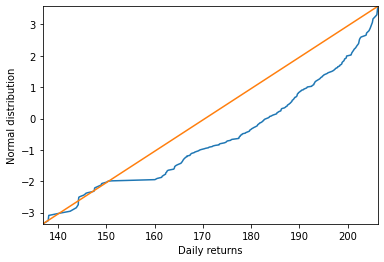

In [519]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

#**Stock Return Analysis**

In [520]:
## Daily Return
returns = close.pct_change(1).dropna()
returns = returns * 100
print(returns)

1      3.501409
2     -2.903882
3      4.713824
4      0.072494
5      3.245198
         ...   
248   -0.514113
249    1.301676
250    0.149195
251   -1.773187
252    0.410937
Name: Close, Length: 252, dtype: float64


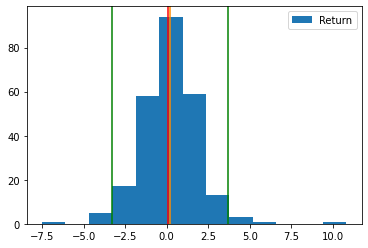

In [521]:
plt.hist(returns, bins="rice", label="Return")
plt.axvline(returns.mean(), color='darkorange')
plt.axvline(returns.median(), color='red')
plt.axvline(returns.mean() - 2*returns.std(), color='green')
plt.axvline(returns.mean() + 2*returns.std(), color='green')

plt.legend()
plt.show()

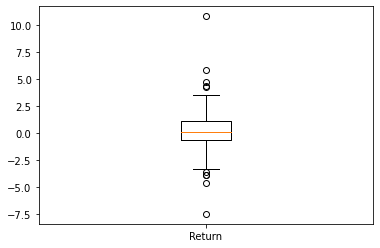

In [522]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

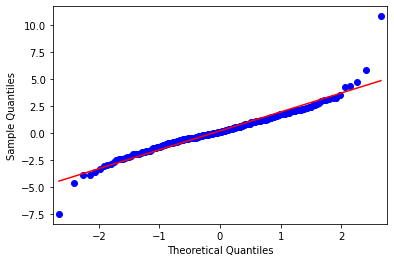

In [523]:
from statsmodels.graphics.gofplots import qqplot
qqplot(returns, line='s')
plt.show()

In [524]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))
print("Skewness of the distribution is: ", stats.skew(returns))
print("Skewtest of the distribution is: ", stats.skewtest(returns))
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Mean is:  0.19331269999856776
Standard deviation is:  1.752615007884313
Median is:  0.10256425204406838
Skewness of the distribution is:  0.6066155840876527
Skewtest of the distribution is:  SkewtestResult(statistic=3.760033371589946, pvalue=0.00016989069235316068)
Kurtosis of the distributionn is:  6.165784944489916
Kurtosis test of the distribution is:  KurtosistestResult(statistic=6.4403503139348155, pvalue=1.191980602739184e-10)


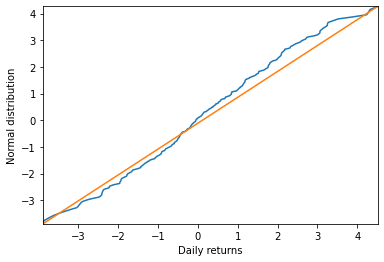

In [525]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()